In [2]:
import numpy as np
import random
import cv2
import copy
from matplotlib import pyplot as plt #for all ur plotting needs

In [3]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


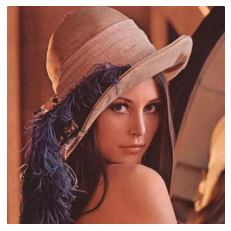

In [4]:
image_color = cv2.imread('D:/FACULTATE/MASTER 1/SEMESTRUL 1/CV1/Laborator/lena.jpg') 
plt.axis("off")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))

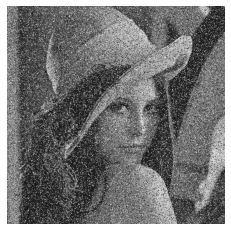

In [5]:
image = cv2.imread('D:/FACULTATE/MASTER 1/SEMESTRUL 1/CV1/Laborator/lena.jpg',0) # Only for grayscale image
noise_img = sp_noise(image,0.1)
plt.axis("off")
plt.imshow(noise_img,cmap='gray')

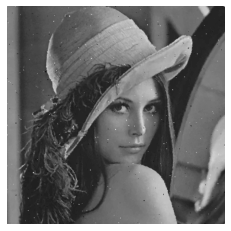

In [6]:
filter_3 = cv2.medianBlur(noise_img, 3)
plt.axis("off")
plt.imshow(filter_3,cmap='gray')

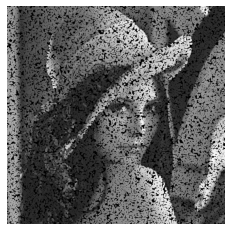

In [7]:
kernel = np.ones((3,3), np.float32)/9
opening_opencv = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
plt.axis("off")
plt.imshow(opening_opencv,cmap='gray')

<ipython-input-8-b04339637986>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  new_image[i][j] = (noise_img[i-1][j-1] + noise_img[i-1][j] + noise_img[i-1][j+1] +


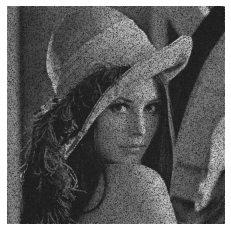

In [8]:
(w,h)=noise_img.shape
new_image = copy.copy(noise_img)
for i in range(1,w-1):
    for j in range(1,h-1):
        if noise_img[i][j] == 0 or noise_img[i][j] ==255:
            new_image[i][j] = (noise_img[i-1][j-1] + noise_img[i-1][j] + noise_img[i-1][j+1] + 
                               noise_img[i][j-1] + noise_img[i][j+1] + 
                               noise_img[i+1][j-1] + noise_img[i+1][j] + noise_img[i+1][j+1])/8
            

plt.axis("off")
plt.imshow(new_image,cmap='gray')           

255


<ipython-input-9-458f6ae10c41>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  new_image2[i][j] = (l[4]+l[5])/2


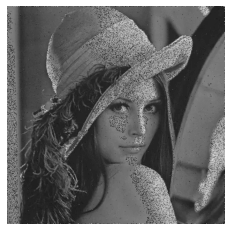

In [9]:
new_image2 = copy.copy(noise_img)
print(max(noise_img[5]))
for i in range(1,w-1):
    for j in range(1,h-1):
        l = list()
        if noise_img[i][j] == 0 or noise_img[i][j] == 255:
#             print("aici")
            l = [noise_img[i-1][j-1], noise_img[i-1][j], noise_img[i-1][j+1], noise_img[i][j-1], noise_img[i][j+1], noise_img[i+1][j-1], noise_img[i+1][j], noise_img[i+1][j+1]]
#             print(l)
            l = np.sort(l)
#             print(l)
#             new_image2[i][j] = l[4]
            new_image2[i][j] = (l[4]+l[5])/2

plt.axis("off")
plt.imshow(new_image2,cmap='gray')   

255


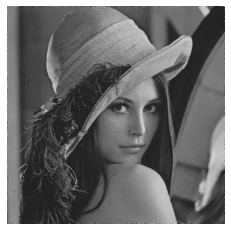

In [10]:
new_image3 = copy.copy(noise_img)
print(max(noise_img[5]))
for i in range(1,w-1):
    for j in range(1,h-1):
        l = list()
        if noise_img[i][j] == 0 or noise_img[i][j] == 255:
#             print("aici")
            l = [noise_img[i-1][j-1], noise_img[i-1][j], noise_img[i-1][j+1], noise_img[i][j-1], noise_img[i][j+1], noise_img[i+1][j-1], noise_img[i+1][j], noise_img[i+1][j+1]]
#             print(l)
            l = np.sort(l)
#             print(l)
#             new_image2[i][j] = l[4]
            new_list = [x for x in l if x > 0]
            if len(new_list) > 0:
                new_image3[i][j] = new_list[0]                

plt.axis("off")
plt.imshow(new_image3,cmap='gray')   

255


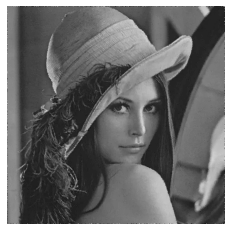

In [11]:
new_image4 = copy.copy(new_image3)
print(max(noise_img[5]))
for i in range(1,w-1):
    for j in range(1,h-1):
        l = list()
        if new_image3[i][j] == 0 or new_image3[i][j] == 255:
#             print("aici")
            l = [new_image3[i-1][j-1], new_image3[i-1][j], new_image3[i-1][j+1], new_image3[i][j-1], new_image3[i][j+1], new_image3[i+1][j-1], new_image3[i+1][j], new_image3[i+1][j+1]]
#             print(l)
            l = np.sort(l)
#             print(l)
#             new_image2[i][j] = l[4]
            new_list = [x for x in l if x > 0]
            if len(new_list) > 0:
                new_image4[i][j] = new_list[0]                

plt.axis("off")
plt.imshow(new_image4,cmap='gray')   

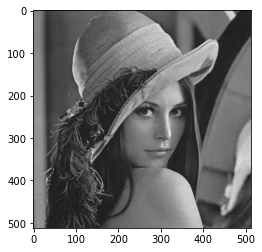

In [12]:
plt.imshow(image,cmap='gray')  

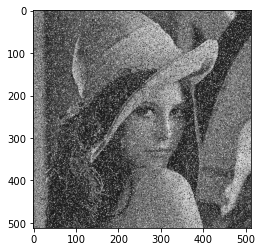

In [13]:
plt.imshow(noise_img,cmap='gray')  